In [53]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import arviz as az
import matplotlib.pyplot as plt
import scipy.linalg as la
import scipy.stats as st
from tqdm import trange

from functions.load_data import load_data
from functions.gibbs_ss_decomp_N import estimate_hsa
from functions.mcmc_stats import mcmc_stats
from functions.mcmc_plot_posterior import plot_prior_posterior
from functions.sddr_beta import sddr_beta
from functions.mcmc_plot_trace import plot_trace

data = load_data()
T = len(data)
pi = data['pi_cpi_core']
pi_prev = data['pi_cpi_core_prev']
Epi = data['Epi_spf_gdp']
x = data['output_gap_BN']
N = data["N"]
burn_in = 5000
n_samples = 15000


/Users/satoshan/.pyenv/versions/miniforge3-4.10.3-10/envs/numpyro-env/lib/python3.11/site-packages/openpyxl/worksheet/header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


In [54]:
priors = {"mu_alpha": 0.5, "sigma_alpha": 0.1, "mu_kappa": 0, "sigma_kappa": 0.1,"mu_theta": 0, "sigma_theta":0.1}
results = estimate_hsa(pi, pi_prev, Epi, x, N, n_burn=burn_in, n_keep=n_samples, priors=priors)
runs = np.column_stack([
    results["alpha"]["draws"],
    results["kappa"]["draws"],
    results["theta"]["draws"],
])
param_names = ["alpha", "kappa", "theta"]
mcmc_stats(runs, burnin=burn_in, param_names=param_names)

Starting Gibbs sampling: burn-in=5000, keep=15000


Gibbs sampling: 100%|██████████| 20000/20000 [03:28<00:00, 95.93it/s] 
/Users/satoshan/GitHub/NKPC_HSA_MCMC/code/functions/mcmc_stats.py:19: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  hpdi = az.hdi(traces, hdi_prob=prob)


,mean,median,sd,error,CI(lower),CI(upper),HPDI(lower),HPDI(upper),$\hat R$
alpha,0.753083,0.755809,0.052837,0.000264,0.641014,0.849785,0.652483,0.859100,1.014069
kappa,0.027259,0.026806,0.021240,0.000106,-0.013423,0.070575,-0.013915,0.069873,1.011217
theta,0.000667,0.017152,0.056031,0.000280,-0.118444,0.104798,-0.123056,0.099460,1.015457


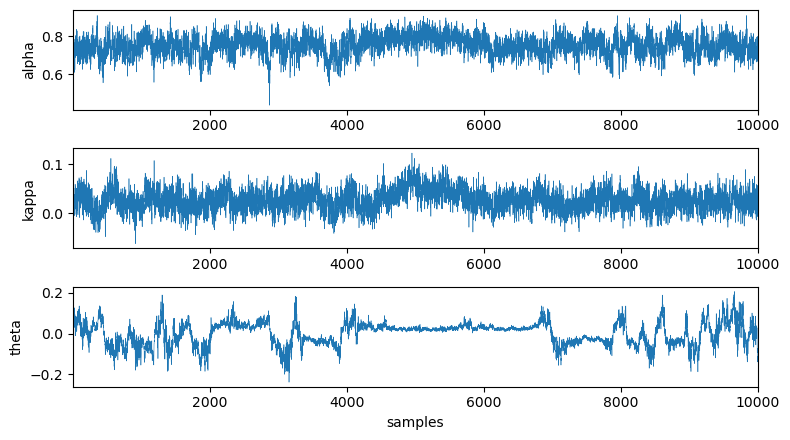

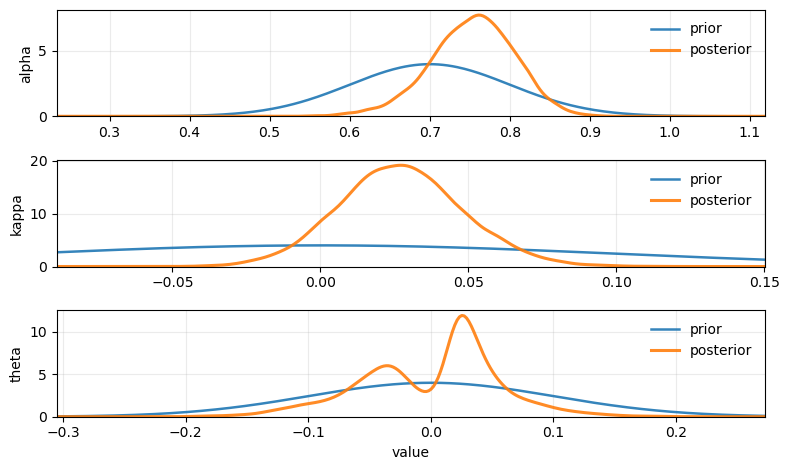

(<Figure size 800x480 with 3 Axes>,
 array([<Axes: ylabel='alpha'>, <Axes: ylabel='kappa'>,
        <Axes: xlabel='value', ylabel='theta'>], dtype=object))

In [55]:
plot_trace(runs, burnin=burn_in, param_names=param_names)
prior_specs = {
    "alpha": {"dist": "norm", "loc": 0.7, "scale": 0.1},
    "kappa": {"dist": "norm", "loc": 0.0, "scale": 0.1},
    "theta": {"dist": "norm", "loc": 0.0, "scale": 0.1},
}
plot_prior_posterior(
    runs,
    prior_specs=prior_specs,
    burnin=burn_in,
    param_names=param_names,
)

In [56]:
priors = {"mu_alpha": 0.5, "sigma_alpha": 1, "mu_kappa": 0, "sigma_kappa": 1,"mu_theta": 0, "sigma_theta":1}
results = estimate_hsa(pi, pi_prev, Epi, x, N, n_burn=burn_in, n_keep=n_samples, priors=priors)
runs = np.column_stack([
    results["alpha"]["draws"],
    results["kappa"]["draws"],
    results["theta"]["draws"],
])
param_names = ["alpha", "kappa", "theta"]
mcmc_stats(runs, burnin=burn_in, param_names=param_names)

Starting Gibbs sampling: burn-in=5000, keep=15000


Gibbs sampling: 100%|██████████| 20000/20000 [03:28<00:00, 96.12it/s] 
/Users/satoshan/GitHub/NKPC_HSA_MCMC/code/functions/mcmc_stats.py:19: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  hpdi = az.hdi(traces, hdi_prob=prob)


,mean,median,sd,error,CI(lower),CI(upper),HPDI(lower),HPDI(upper),$\hat R$
alpha,0.797990,0.800776,0.057388,0.000287,0.672267,0.904988,0.683818,0.914705,0.993160
kappa,0.040600,0.040225,0.022213,0.000111,-0.001395,0.085575,-0.001394,0.085593,1.004262
theta,0.002206,-0.017062,0.059031,0.000295,-0.105768,0.127320,-0.097736,0.132158,1.191803


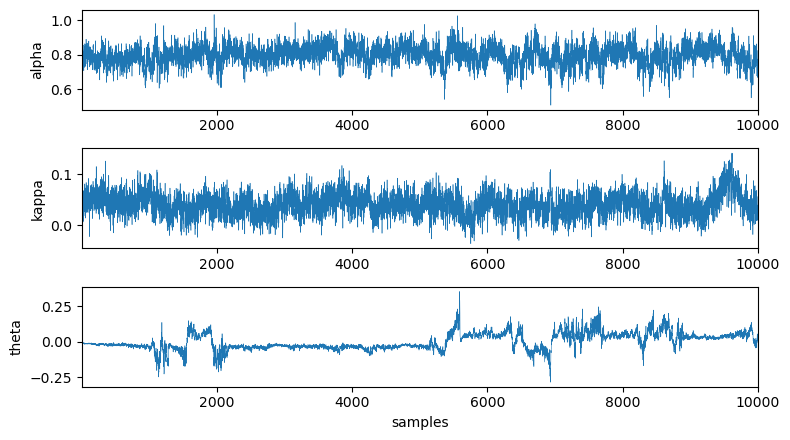

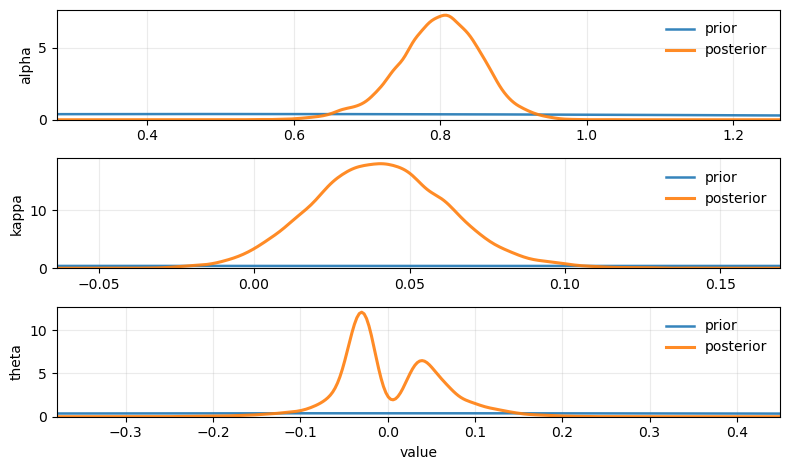

(<Figure size 800x480 with 3 Axes>,
 array([<Axes: ylabel='alpha'>, <Axes: ylabel='kappa'>,
        <Axes: xlabel='value', ylabel='theta'>], dtype=object))

In [57]:
plot_trace(runs, burnin=burn_in, param_names=param_names)
prior_specs = {
    "alpha": {"dist": "norm", "loc": 0.5, "scale": 1},
    "kappa": {"dist": "norm", "loc": 0.0, "scale": 1},
    "theta": {"dist": "norm", "loc": 0.0, "scale": 1},
}
plot_prior_posterior(
    runs,
    prior_specs=prior_specs,
    burnin=burn_in,
    param_names=param_names,
)

In [58]:
priors = {"mu_alpha": 0.7, "sigma_alpha": 1000, "mu_kappa": 0, "sigma_kappa": 1000,"mu_theta": 0, "sigma_theta":1000}
results = estimate_hsa(pi, pi_prev, Epi, x, N, n_burn=burn_in, n_keep=n_samples, priors=priors)
runs = np.column_stack([
    results["alpha"]["draws"],
    results["kappa"]["draws"],
    results["theta"]["draws"],
])
param_names = ["alpha", "kappa", "theta"]
mcmc_stats(runs, burnin=burn_in, param_names=param_names)

Starting Gibbs sampling: burn-in=5000, keep=15000


Gibbs sampling: 100%|██████████| 20000/20000 [03:27<00:00, 96.49it/s] 
/Users/satoshan/GitHub/NKPC_HSA_MCMC/code/functions/mcmc_stats.py:19: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  hpdi = az.hdi(traces, hdi_prob=prob)


,mean,median,sd,error,CI(lower),CI(upper),HPDI(lower),HPDI(upper),$\hat R$
alpha,0.799191,0.802497,0.059790,0.000299,0.669443,0.908144,0.677877,0.914669,0.993328
kappa,0.037929,0.037548,0.023480,0.000117,-0.006998,0.085806,-0.008945,0.083371,1.010313
theta,0.011235,0.023099,0.054091,0.000270,-0.095505,0.114539,-0.096379,0.112573,0.963840


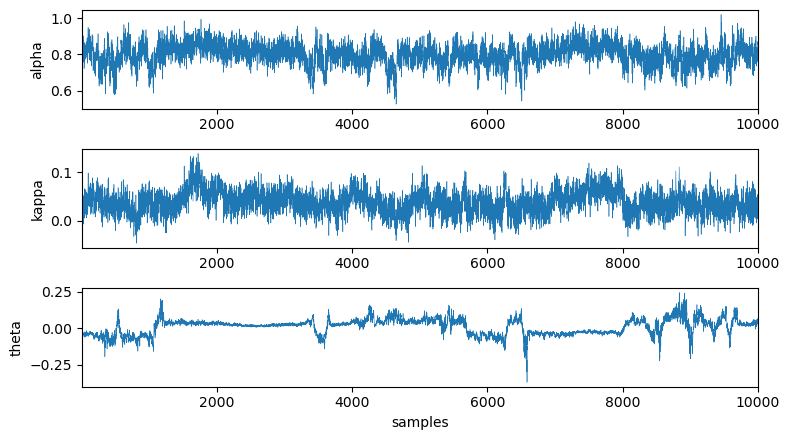

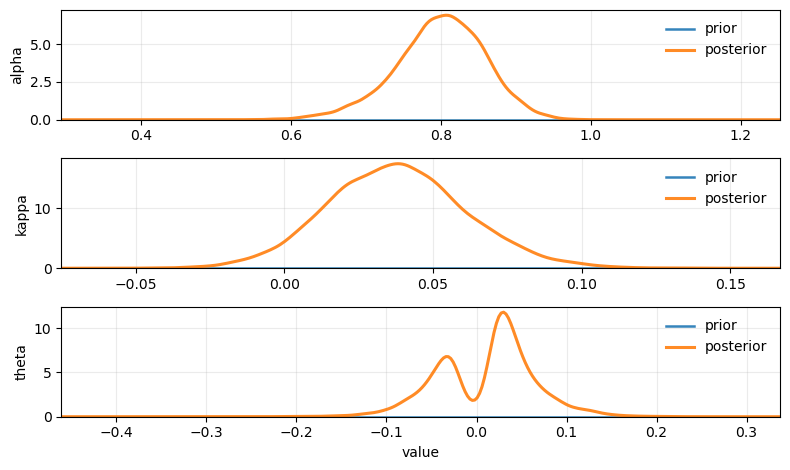

(<Figure size 800x480 with 3 Axes>,
 array([<Axes: ylabel='alpha'>, <Axes: ylabel='kappa'>,
        <Axes: xlabel='value', ylabel='theta'>], dtype=object))

In [59]:
plot_trace(runs, burnin=burn_in, param_names=param_names)
prior_specs = {
    "alpha": {"dist": "norm", "loc": 0.7, "scale": 1000},
    "kappa": {"dist": "norm", "loc": 0.0, "scale": 1000},
    "theta": {"dist": "norm", "loc": 0.0, "scale": 1000},
}
plot_prior_posterior(
    runs,
    prior_specs=prior_specs,
    burnin=burn_in,
    param_names=param_names,
)